<a href="https://colab.research.google.com/github/rifki2997/purwadhika_project/blob/main/PurwadhikaAirBnBBangkok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PURWADHIKA AIRBNB BANGKOK**

# **Latar Belakang**
Purwadhika AirBnB adalah perusahaan yang bergerak di bidang AirBnB serta mempunyai aplikasi di bidang AirBnB dan sedang melakukan research dengan data yang mereka miliki. Perusahaan melakukan penelitian terhadap AirBnB listing Bangkok Data dengan harapan dapat mengetahui pilihan turis dalam menentukan penginapan di thailand dari berbagai data yang didapat.

# **Pernyataan Masalah**
Pengguna aplikasi ingin mengetahui faktor apa yang mempengaruhi turis untuk memilih penginapan ketika berlibur di bangkok berdasarkan data yang di analysis.

Sebagai seorang data analyst, saya akan mencoba menjawab pertanyaan berikut:

Bagaimana karakteristik turis yang ingin liburan ke bangkok?


# **Data**
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset yang digunakan adalah https://drive.google.com/file/d/1Kagt-IMGruvyBV3tH6HYa721JK-TN-56/view?usp=drive_link .

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada 14 kolom di dalam dataset hr_analytics, yaitu:  

* id : ID unik untuk tiap kandidat
* name: kode untuk kota
* host_id : unique identifikasi untuk host/user
* host_name: nama identifikasi untuk host/user
* latitude: projeksi latitude penginapan
* longitude: projeksi longtitude penginapan
* room_type: type kamar yang ditempati: Entire place, Private rooms, Shared Rooms
* minimum_nights : minimum malam menginap
* number_of_reviews: jumlah review
* last_review: kapan terakhir di review
* calculated_host_listings_count : jumlah properti yang dipunyai host / user di wilayah tersebut
* availability_365: ketersediaan kamar ke depannya
* number_of_reviews_ltm:jumlah review dalm 12 bulan  


Berikut 5 baris teratas dan terbawah dari dataset.

In [4]:
df=pd.read_csv('/content/sample_data/Airbnb Listings Bangkok (1).csv')
df = df[['id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']]
display(df.head(),df.tail())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding and Cleaning
Sebelum menganalisis data, sebagai data analyst, saya perlu mengenal dataset atau masuk ke tahapan *data understanding*. Dari proses ini, kita mendapati anomali-anomali apa saja yang terdapat di dalam dataset yang disediakan dan perlu ditangani dalam tahapan *data cleaning*. Setiap penanganan anomali yang dilakukan, akan disertai dengan penjelasan langkah yang diambil.


In [5]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15854 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064

In [6]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15854,15854,15854,10064
unique,14794,5313,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [7]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
list1 = []
for col in df.columns :
    list1.append( [col, df[col].nunique(), df[col].unique()])

tabel1 = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list1)
tabel1

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 b

In [8]:
df.isna().sum()

id                                0   
name                              8   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

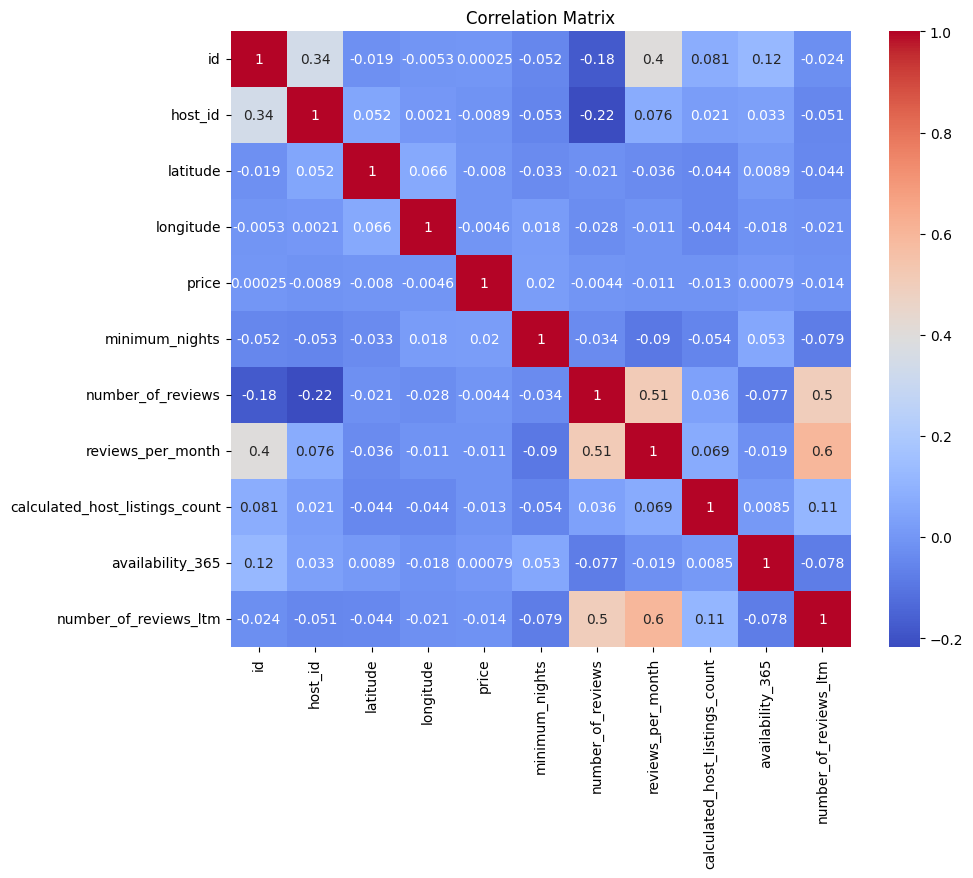

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Secara umum, kita bisa melihat bahwa:
* dataset AirBnB listings Bangkok memiliki 16 kolom dan 15.854 baris
* beberapa kolom, yaitu, `name`, `last_review`,dan `reviews_per_month` memiliki data kosong.  Data di `last_review`,dan `reviews_per_month` memiliki NaN.
* kolom `latitude` dan `longtitude` berisikan id unik untuk menentukan lokasi.
* kolom  `host_id` berisikan id unik untuk tiap host, sehingga tidak relevan dalam analisis dan bisa dihapus saja. Sedangkan `host_name` juga dihapus dikarenakan tidak ada hubungan dengan penelitian ini.
* kolom `name` memiliki data tipe object serta memiliki karakter yang unik sehingga perlu diganti.
* kolom `availability_365` memiliki data 0 yang artinya tempat tersebut sering penuh.

## Missing Value

In [10]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.000000 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

<Axes: >

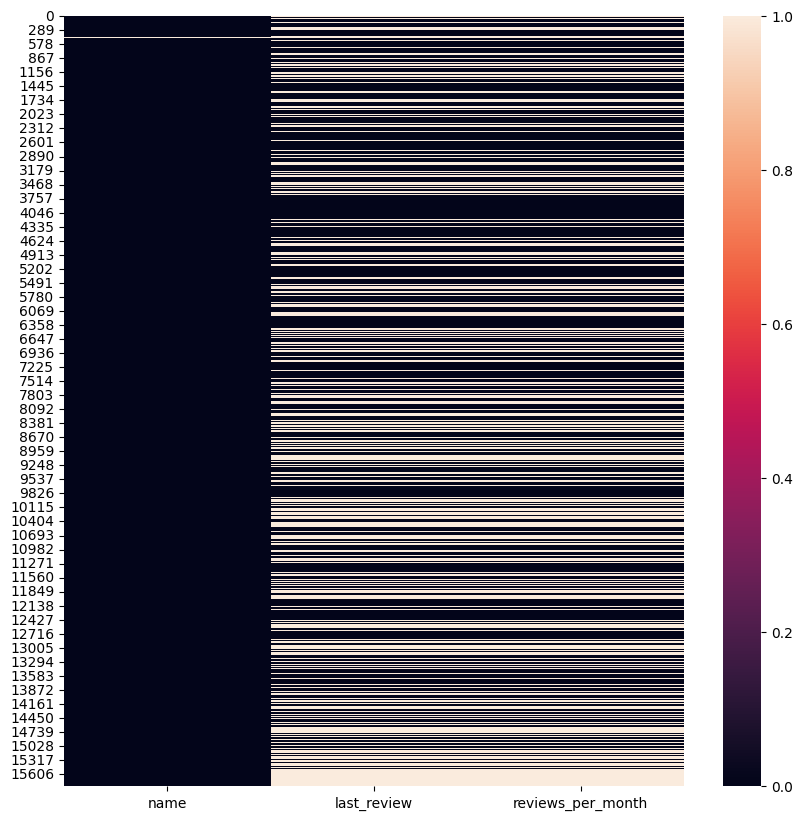

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['name', 'last_review', 'reviews_per_month']].isna())

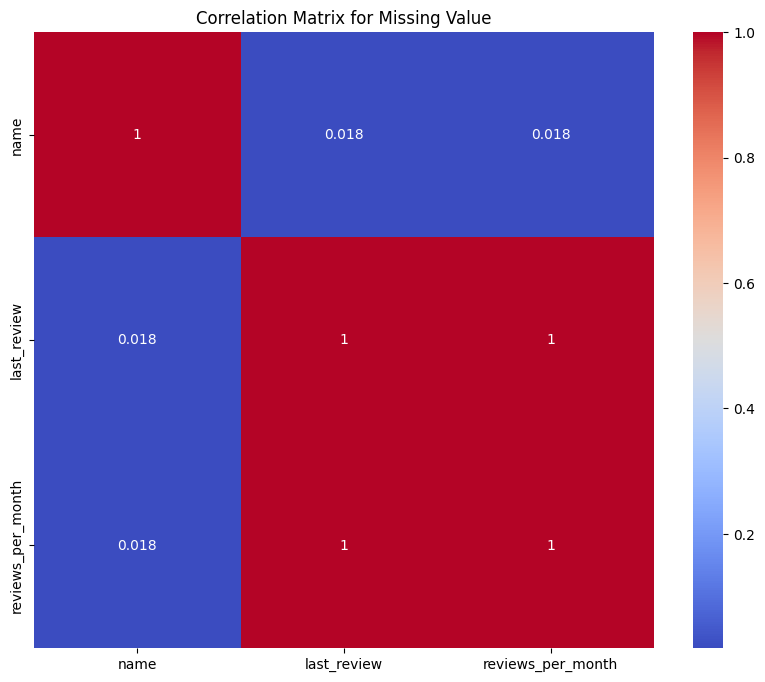

In [12]:
correlation_matrix1 = df[['name', 'last_review', 'reviews_per_month']].isna().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Missing Value')
plt.show()

Secara garis besar:  
* *missing value* di kolom `last_review`,dan `reviews_per_month` memiliki proporsi yang cukup tinggi mencapai 36.52%.
* *missing value* di kolom `name` memiliki porsi sedikit yaitu sekitar 0.05 %
* *missing value* di kolom `last_review`,dan `reviews_per_month` memiliki korelasi data.


Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini  disarankan dalam kasus, karena untuk menyederhanakan data.
* kedua, mengisi data yang hilang. Cara ini dilakukan dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli.

Ketika sudah mendapat gambaran kasar anomali di data, tahap selanjutnya, saya melihat dan menangani tiap-tiap anomali secara lebih jauh.

In [13]:
df['name'].value_counts()

New!  La Chada Night Market studio 2PPL near MRT                   45
30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P)                 35
New!  La Chada Night Market 1BR 2PPL near MRT                      35
New! Gateway/ Bangkok University 1BR 2PPL near BTS                 29
30days!  Sukhumvit NANA spacious 1BR 2PPL near BTS                 25
                                                                   ..
竹 レジデンス Japanese room 1Br 162m BTS Thonglor-Ekmai                  1 
Studio Superior- Hotel Right next to BTS Station Sukhumvit Line    1 
Bunker, the anonymous studio: convenience in style                 1 
One-bedroom Suite:Hotel Right next to BTS Station                  1 
素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街                      1 
Name: name, Length: 14794, dtype: int64

In [14]:
#karena presentase nya sedikit maka akan didrop
df['name'].dropna(inplace=True)

In [15]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

Jumlah baris dan kolom di dataset df adalah (15854, 16)


In [16]:
df = df[df['name'].notna()]
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

Jumlah baris dan kolom di dataset df adalah (15846, 16)


Dikarenakan adanya NaN value di 'name' kolom menyebabkan error ketika menggunakan metode dropna(). oleh karena itu, saya menggunakn notna() metode untuk membuat topeng boolean supaya filter kolom yang tidak missing value di 'name' kolom.

In [17]:
from collections import Counter
import re
# Join all names into a single string
all_names = ' '.join(df['name'].astype(str))

# Split the string into words using whitespace as the separator
words = re.findall(r'\w+', all_names.lower())


In [18]:
word_counts = Counter(words)
#threshold represents the minimum frequency required for a word to be considered a common keyword
threshold = 1000
common_keywords = [word for word, count in word_counts.items() if count > threshold]
print(common_keywords)

['room', 'in', 'bangkok', 'the', 'condo', '1', 'pool', 'near', 'bts', 'mrt', 'sukhumvit', 'to', '2']


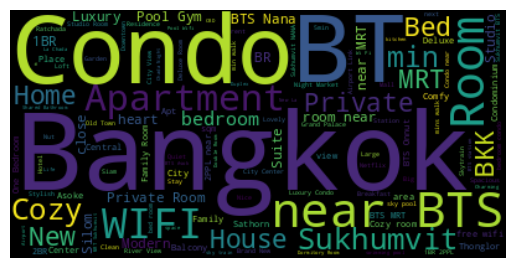

In [19]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(all_names)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### `company_size` dan `company_type`
Sebelum memulai, mari kita ubah data '10/49' di kolom `company_size`menjadi '10-49'.

In [20]:
df['reviews_per_month'].value_counts()

0.02     498
0.03     466
1.00     304
0.05     248
0.04     223
        ... 
6.70     1  
4.26     1  
6.12     1  
4.57     1  
16.00    1  
Name: reviews_per_month, Length: 513, dtype: int64

In [21]:
df['reviews_per_month'] = df['reviews_per_month']*100
df['reviews_per_month'].value_counts()

2.0       498
3.0       466
100.0     304
5.0       248
4.0       223
         ... 
670.0     1  
426.0     1  
612.0     1  
457.0     1  
1600.0    1  
Name: reviews_per_month, Length: 513, dtype: int64

In [22]:
df['last_review'].value_counts()

2022-12-11    189
2022-12-14    184
2022-12-13    179
2022-12-12    172
2022-12-10    142
             ... 
2015-04-20    1  
2020-10-12    1  
2014-06-30    1  
2020-07-13    1  
2022-05-08    1  
Name: last_review, Length: 1668, dtype: int64

Setelah mengetahui data di `last_review`,dan `reviews_per_month`, dikarenakan `last_review` tidak memiliki korelasi dengan data data yang lain kecuali untuk missing value, maka kolom `last_review` didrop. Setelah menghapus column, jumlah kandidat dengan data kosong di `reviews_per_month` berdasarkan `number_of_reviews` dan `number_of_reviews_ltm`.

In [23]:
df.drop('last_review', axis=1, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,50.0,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,3.0,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,3,365,0


In [24]:
# jumlah kandidat dengan data kosong di 'reviews_per_month' berdasarkan 'number_of_reviews' dan 'number_of_reviews_ltm'
display(df[df['reviews_per_month'].isna()]['number_of_reviews'].value_counts(),
df[df['reviews_per_month'].isna()]['number_of_reviews_ltm'].value_counts())

0    5784
Name: number_of_reviews, dtype: int64

0    5784
Name: number_of_reviews_ltm, dtype: int64

dari pernyataan di atas menyatakan bahwa apabila `reviews_per_month` yang mengandung missing value sebaiknya dihapus karena dari `number_of_reviews` dan `number_of_reviews_ltm` tidak ada isinya alias 0.

In [25]:
df = df[df['reviews_per_month'].notna()]
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.head()

Jumlah baris dan kolom di dataset df adalah (10062, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,50.0,2,353,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,3.0,1,323,1
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,17.0,41,365,0
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,1.0,1,365,0
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,9.0,1,365,0


dari hasil analisa ditemukan adanya 0 di `number_of_reviews_ltm` sehingga dapat disimpulkan baris yang mengandung 0 sebaiknya dihapus supaya data dapat dikatakan valid untuk diproses.

In [26]:
df['number_of_reviews_ltm'].value_counts()

0      3428
1      1482
2      849 
3      611 
4      485 
      ...  
147    1   
67     1   
73     1   
277    1   
101    1   
Name: number_of_reviews_ltm, Length: 85, dtype: int64

In [27]:
# Drop rows where 'number_of_reviews' is equal to 0
df = df[df['number_of_reviews_ltm'] != 0]
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

Jumlah baris dan kolom di dataset df adalah (6634, 15)


dari hasil analisa ditemukan adanya 0 di `availability_365` tetapi hal ini menandakan bahwa tempat penginapan penuh, terpecaya, dan sering dipakai oleh turis. dengan pemahaman tersebut, maka kolom `availability_365` akan diisi dengan yes dan no.

In [28]:
# ubah 'availability_365' dari column ke string
df['availability_365'] = df['availability_365'].astype(str)

# mengganti value dengan kondisi tertentu dan ubah menjadi 'Yes' atau 'No'
# No berarti kamar penuh
df['availability_365'] = np.where(df['availability_365'] < '365', 'Yes', 'No')
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,3.0,1,Yes,1
11,1765918,2BR apt in a cozy neighborhood,9279712,Jing,Phaya Thai,13.774860,100.542720,Entire home/apt,1893,15,129,117.0,1,Yes,1
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,259.0,1,Yes,3
28,145343,Boutique Rooms Near Bangkok Airport,703944,Parinya,Lat Krabang,13.721868,100.771713,Private room,1329,1,28,28.0,1,Yes,13
30,156583,Studio near Chula University/Silom walk to MRT/BTS,58920,Gael,Bang Rak,13.728500,100.523130,Entire home/apt,1176,7,63,47.0,2,No,2


setelah selesai merubah, drop kolom yang tidak dibutuhkan dalam analisa seperti `id`, `latitude`, `longtitude` dan `host_id`. setelah selesai

In [29]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [30]:
df = df[['name', 'host_name', 'neighbourhood',
         'room_type', 'price', 'minimum_nights',
       'number_of_reviews','reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']]
df.head()

,name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Private room,1286,7,2,3.0,1,Yes,1
11,2BR apt in a cozy neighborhood,Jing,Phaya Thai,Entire home/apt,1893,15,129,117.0,1,Yes,1
19,The Duplex - Asoke- Luxury 92sqm,Timo,Vadhana,Entire home/apt,5034,21,287,259.0,1,Yes,3
28,Boutique Rooms Near Bangkok Airport,Parinya,Lat Krabang,Private room,1329,1,28,28.0,1,Yes,13
30,Studio near Chula University/Silom walk to MRT/BTS,Gael,Bang Rak,Entire home/apt,1176,7,63,47.0,2,No,2


In [31]:
from google.colab import files

# Save the DataFrame to a CSV file
df.to_csv('Airbnb_Listings_Bangkok_clean.csv', index=False)

# Download the CSV file
files.download('Airbnb_Listings_Bangkok_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Analisis
 Setelah melakukan tahap data cleaning, saya mulai melakukan analisis dengan mencari tahu **bagaimana karakteristik turis yang memilih tempat penginapan tersebut?**.  

Analisis akan dilakukan dengan membandingkan data berdasarkan fitur yang tersedia. Dari 6634 data,terdapat 1118 data berasal dari tempat penginapan yang tidak direservasi, kita perlu berhati-hati dalam membandingkan data kandidat berdasarkan data.

In [32]:
df['availability_365'] = df['availability_365'].astype(str)
df['availability_365'].value_counts()
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}, dan data {df["availability_365"].value_counts()}')

Jumlah baris dan kolom di dataset df adalah (6634, 11), dan data Yes    5516
No     1118
Name: availability_365, dtype: int64


## Berdasarkan `Neighbourhood`  

Pertama, mari melihat bagaimana pengaruh letak atau lokasi para pelancong. Kita akan menganalisis kolom  `neighbourhood`,`room_type`,`minimum_nights` dan `price` untuk menjawab beberapa pertanyaan. untuk visualisasi yang lengkap, saya menggunakan tableau dengan link:https://public.tableau.com/app/profile/muhammad.rifki.hartanto/viz/Purwadhika_AirBnB_Bangkok/Story1?publish=yes .


In [33]:
# 10 wilayah dengan harga dan malam minimum paling banyak beserta tipe kamar
df1 = df[['neighbourhood','room_type', 'price', 'minimum_nights']]
df1.sort_values('price',ascending=False).head(10)

,neighbourhood,room_type,price,minimum_nights
12300,Vadhana,Entire home/apt,1014758,30
4622,Vadhana,Entire home/apt,100194,3
1200,Bang Na,Entire home/apt,35000,998
10357,Vadhana,Entire home/apt,32123,2
10328,Khlong Toei,Entire home/apt,31000,1
10218,Vadhana,Entire home/apt,28000,3
13906,Suanluang,Private room,26338,1
518,Parthum Wan,Entire home/apt,24536,1
3415,Vadhana,Hotel room,24390,2
13062,Bang Na,Entire home/apt,23900,1


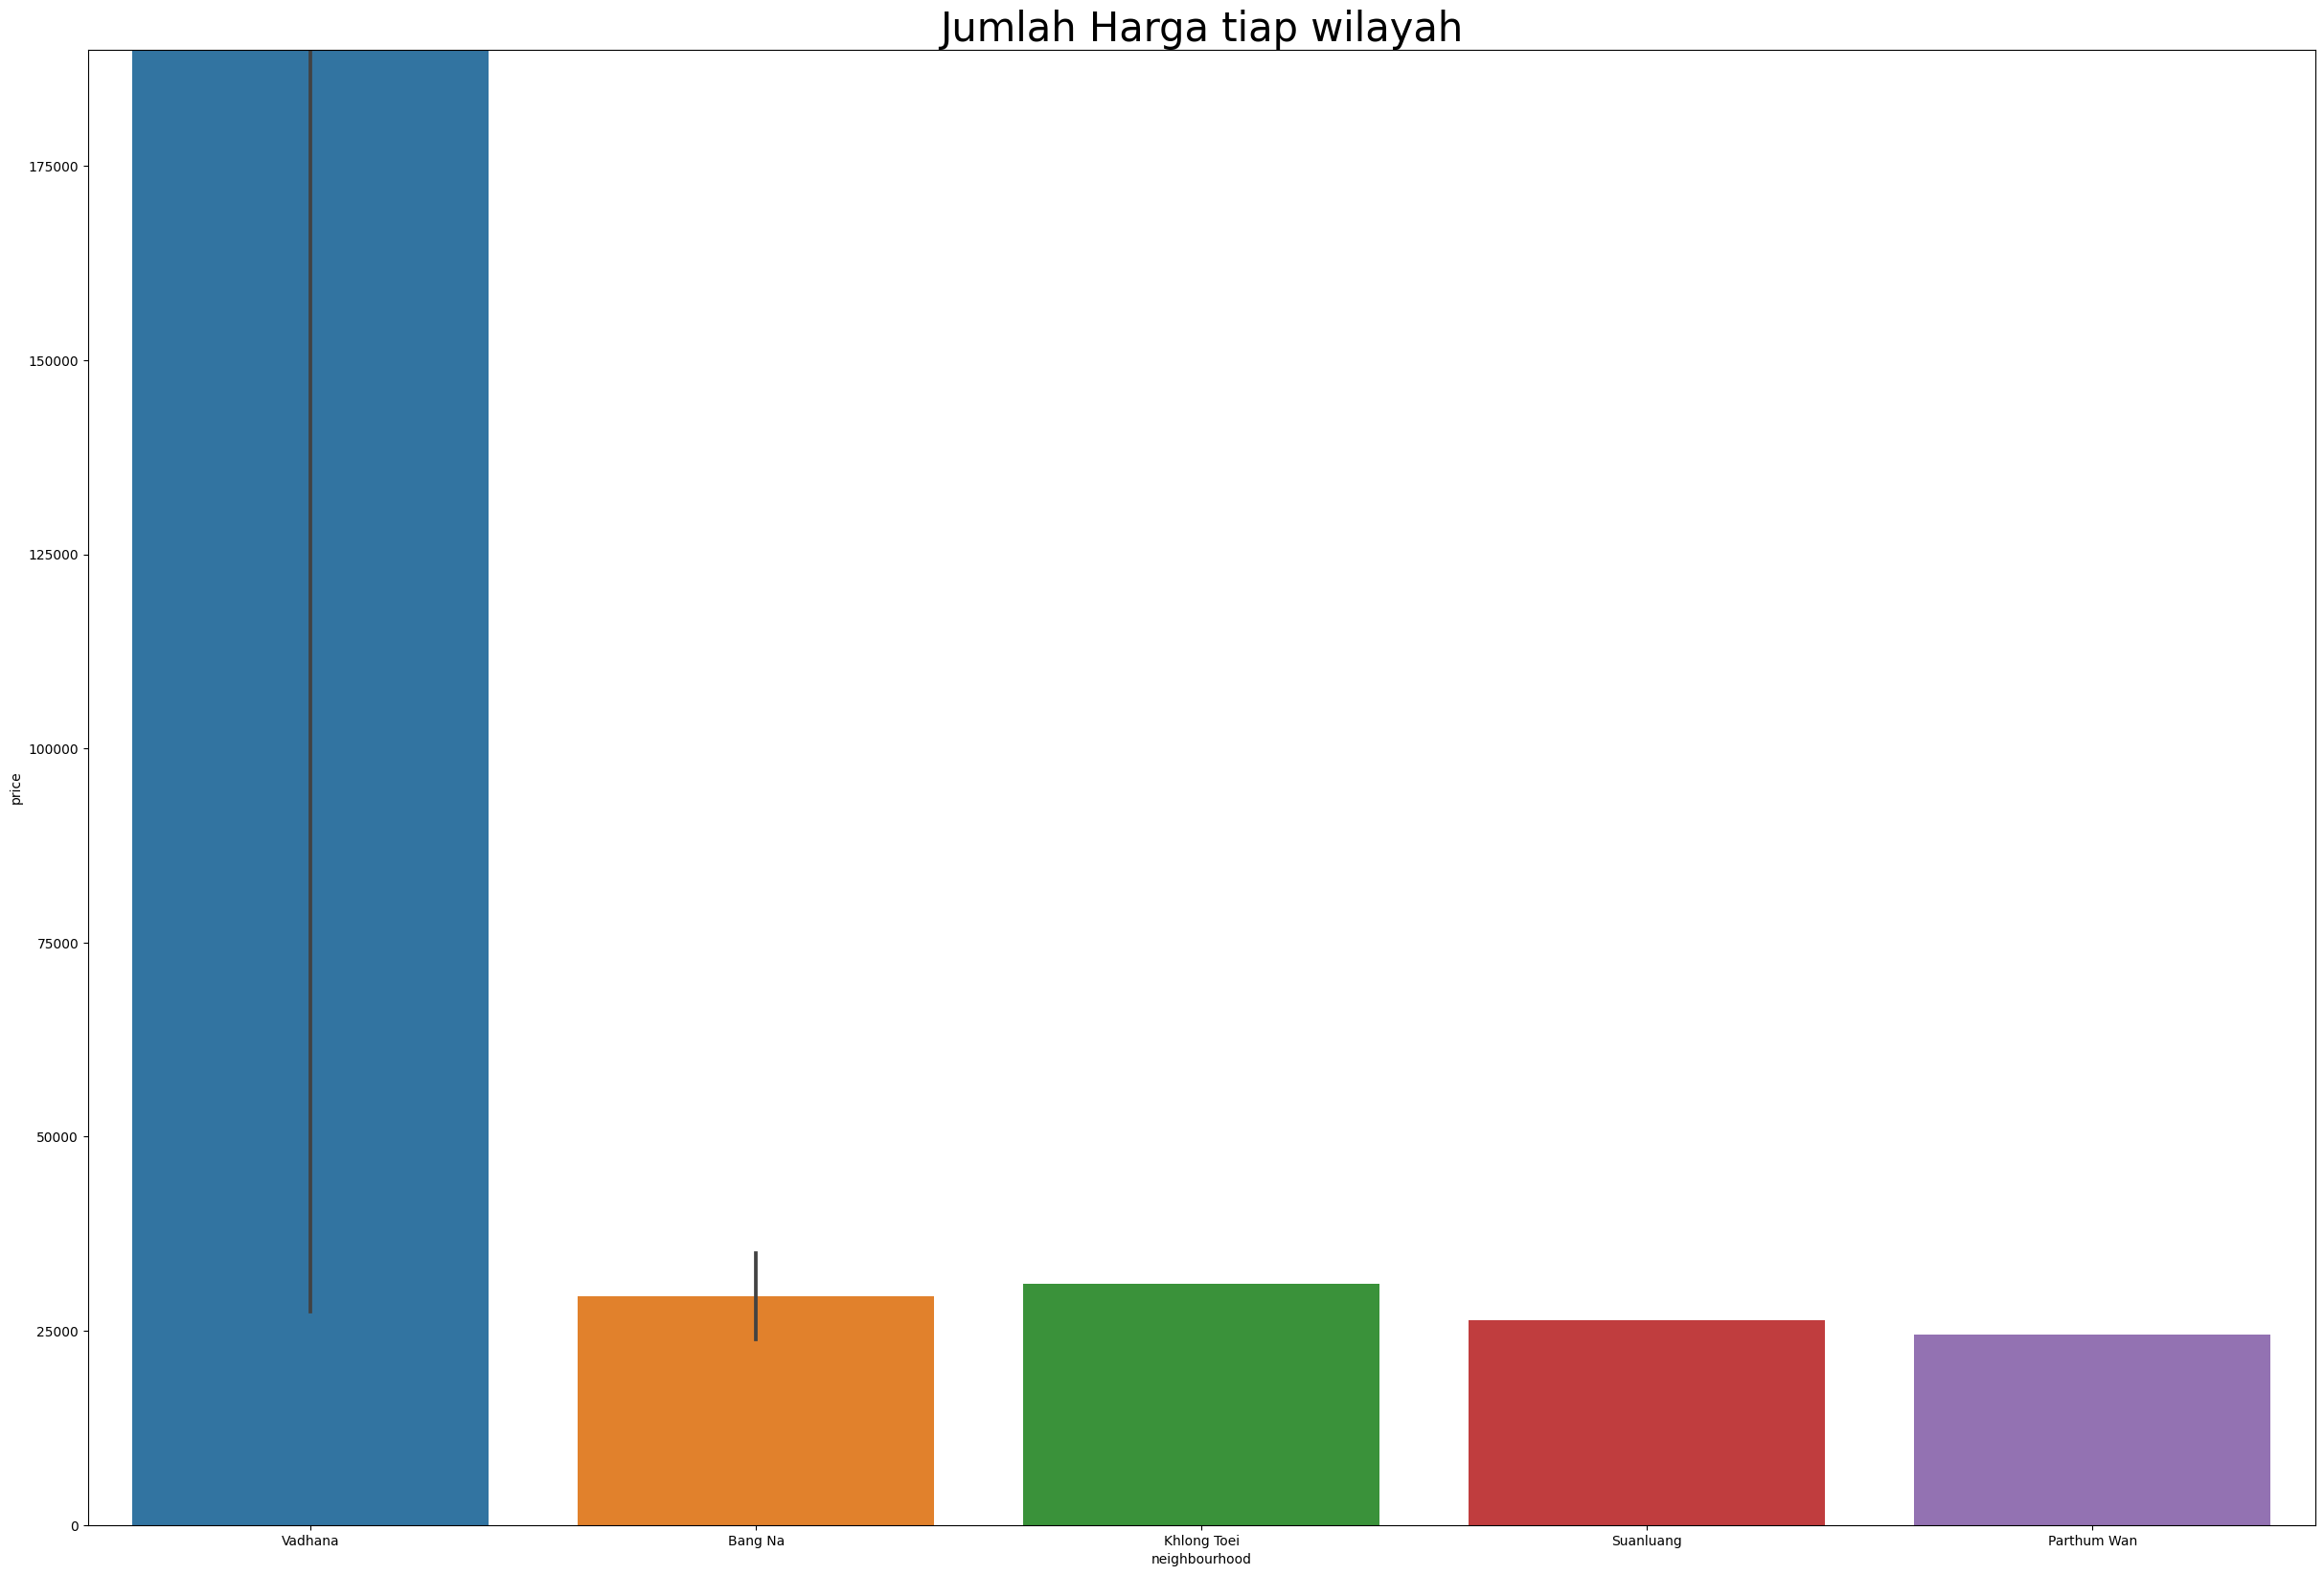

In [34]:
df1_sort1 = df1.nlargest(10, 'price')
plt.figure(figsize = (30,20))
sns.barplot(data = df1_sort1, x = 'neighbourhood', y = 'price')
plt.title("Jumlah Harga tiap wilayah", size = 30)
plt.xlabel("neighbourhood")
plt.ylabel("price")
y_min = 0
y_max = 190000
plt.ylim(y_min, y_max)

plt.show()
plt.show()

In [35]:
df1.sort_values('minimum_nights',ascending=False).head(10)

,neighbourhood,room_type,price,minimum_nights
1200,Bang Na,Entire home/apt,35000,998
8888,Chatu Chak,Entire home/apt,1000,365
12240,Din Daeng,Entire home/apt,900,365
12263,Khlong Toei,Private room,798,365
12008,Lat Phrao,Entire home/apt,14150,365
12323,Khlong Toei,Entire home/apt,14971,365
12324,Khlong Toei,Entire home/apt,12614,365
8707,Khlong Toei,Entire home/apt,900,365
12414,Vadhana,Entire home/apt,1000,365
5109,Khlong Toei,Entire home/apt,17886,365


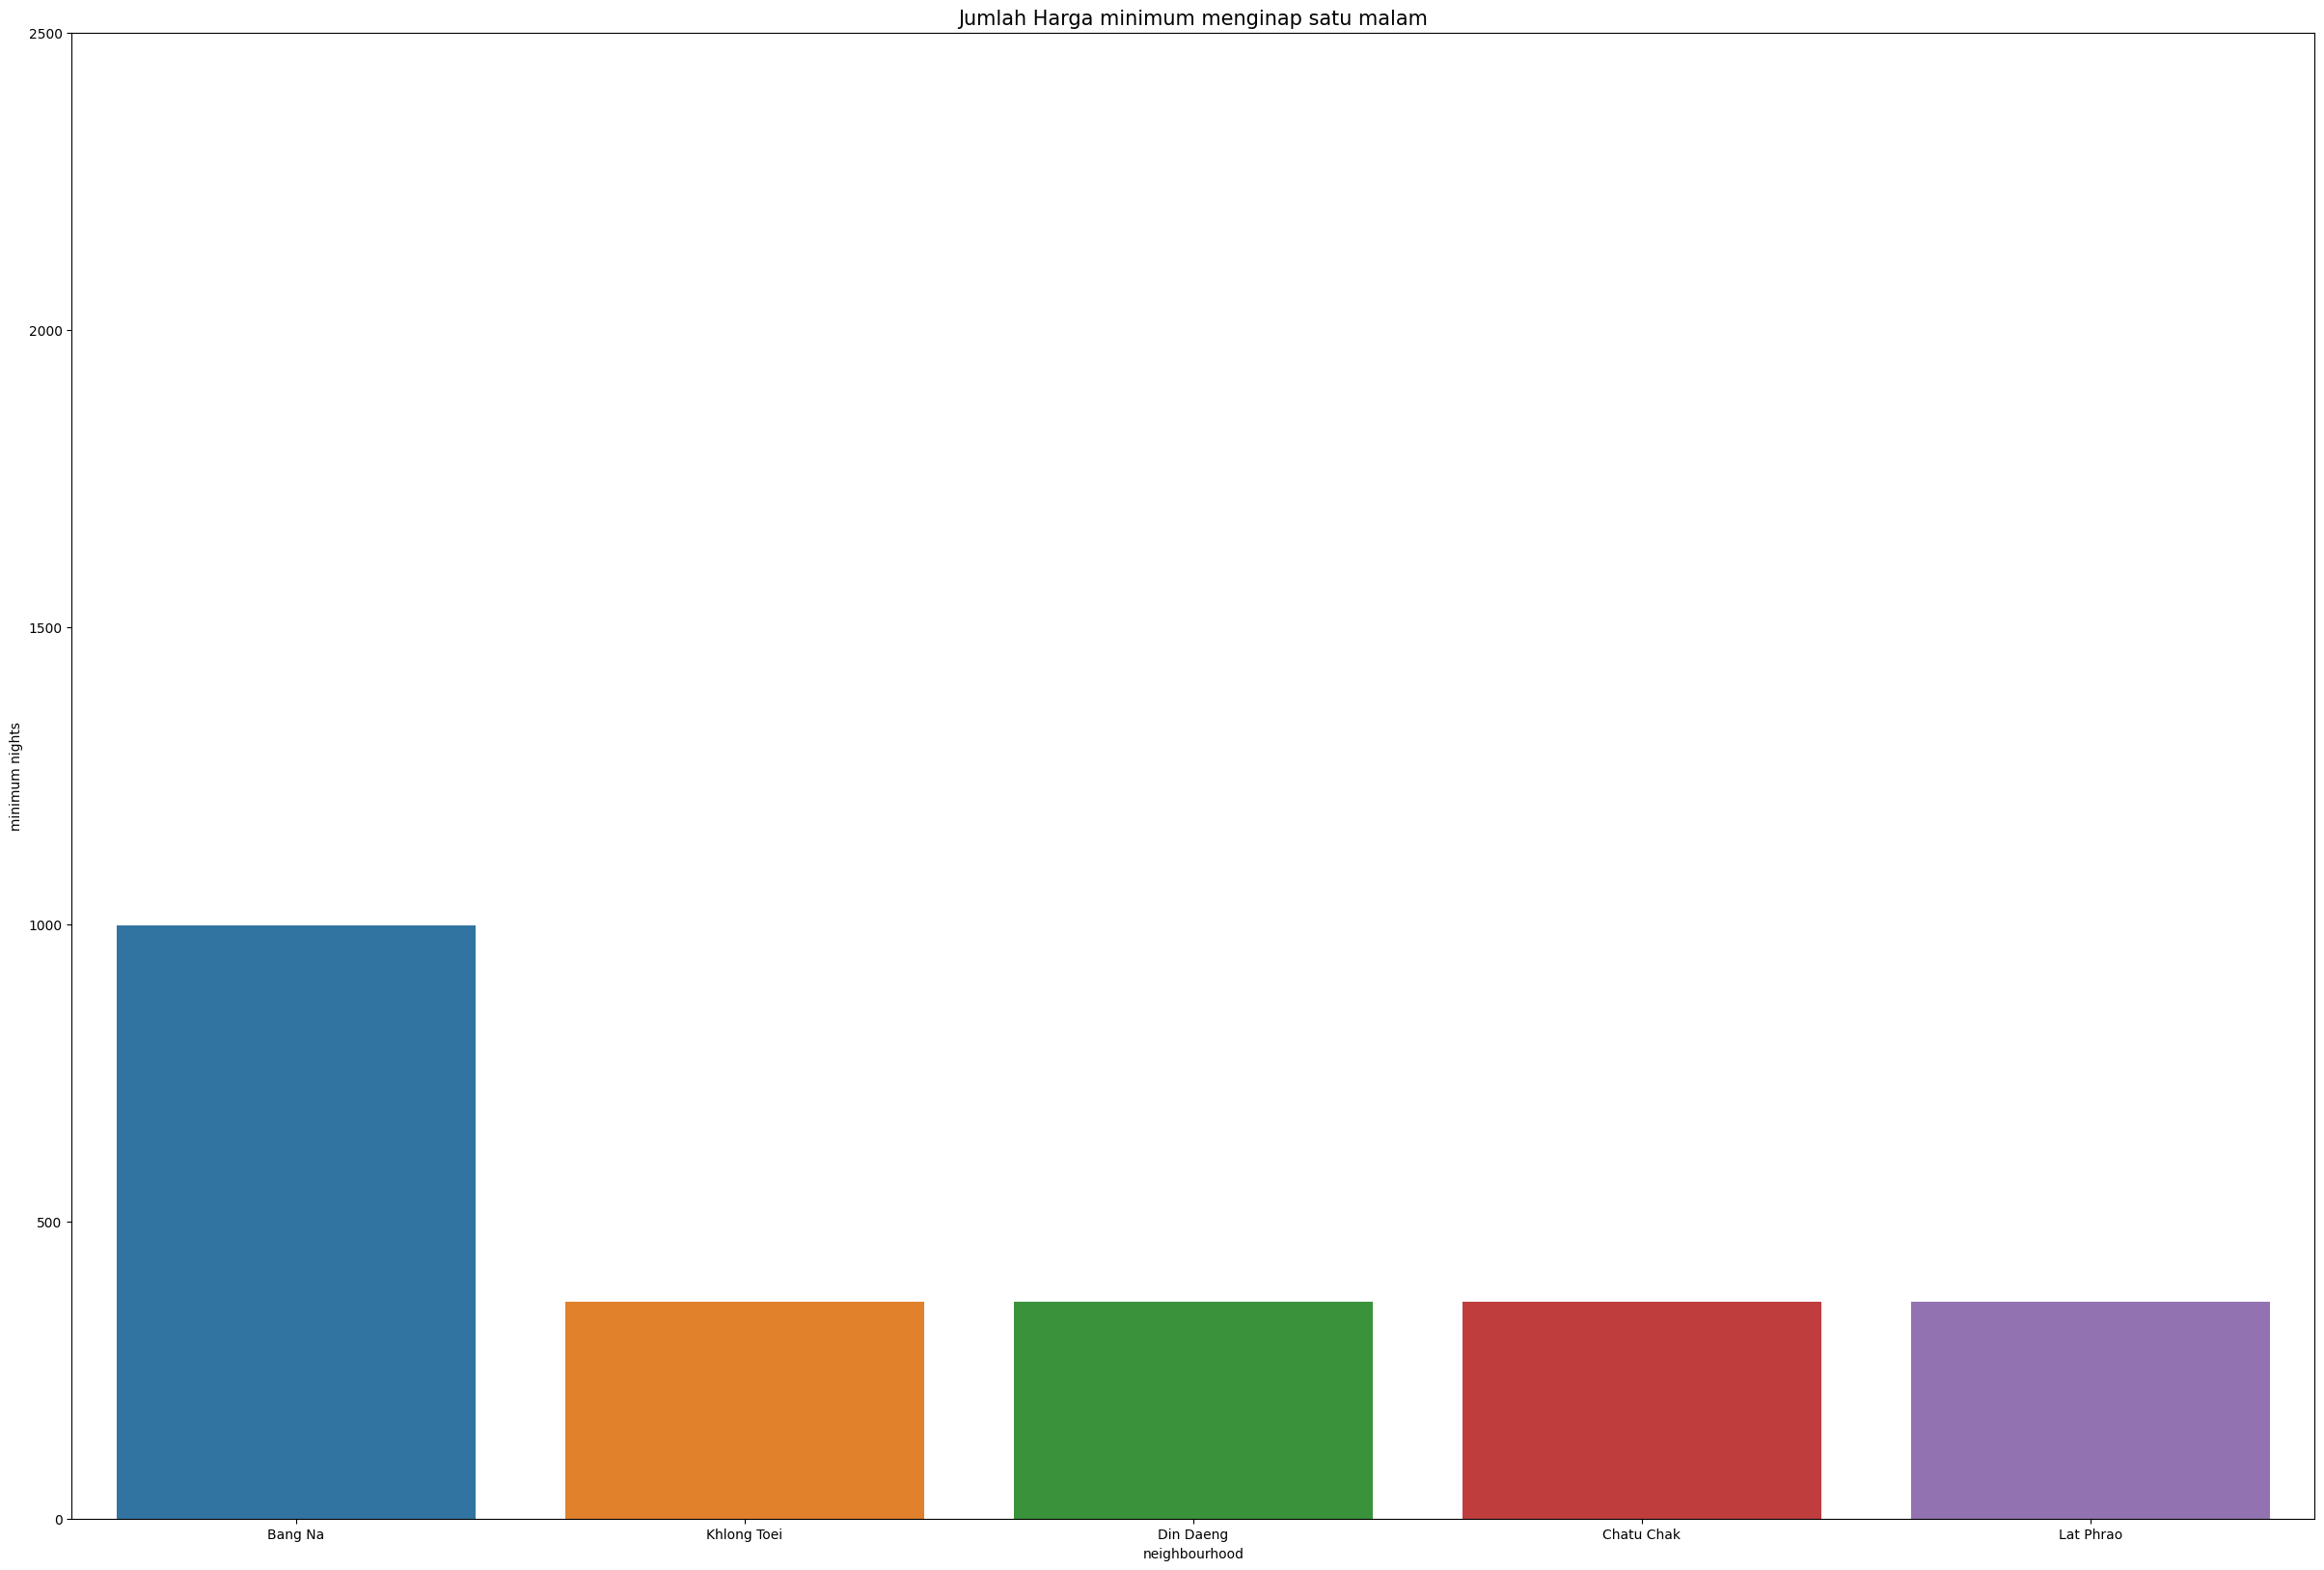

In [36]:
df1_sort1 = df1.nlargest(10, 'minimum_nights')
plt.figure(figsize = (30,20))
sns.barplot(data = df1_sort1, x = 'neighbourhood', y = 'minimum_nights')
plt.title("Jumlah Harga minimum menginap satu malam", size = 15)
plt.xlabel("neighbourhood")
plt.ylabel("minimum nights")
y_min = 0
y_max = 2500
plt.ylim(y_min, y_max)
plt.show()
plt.show()

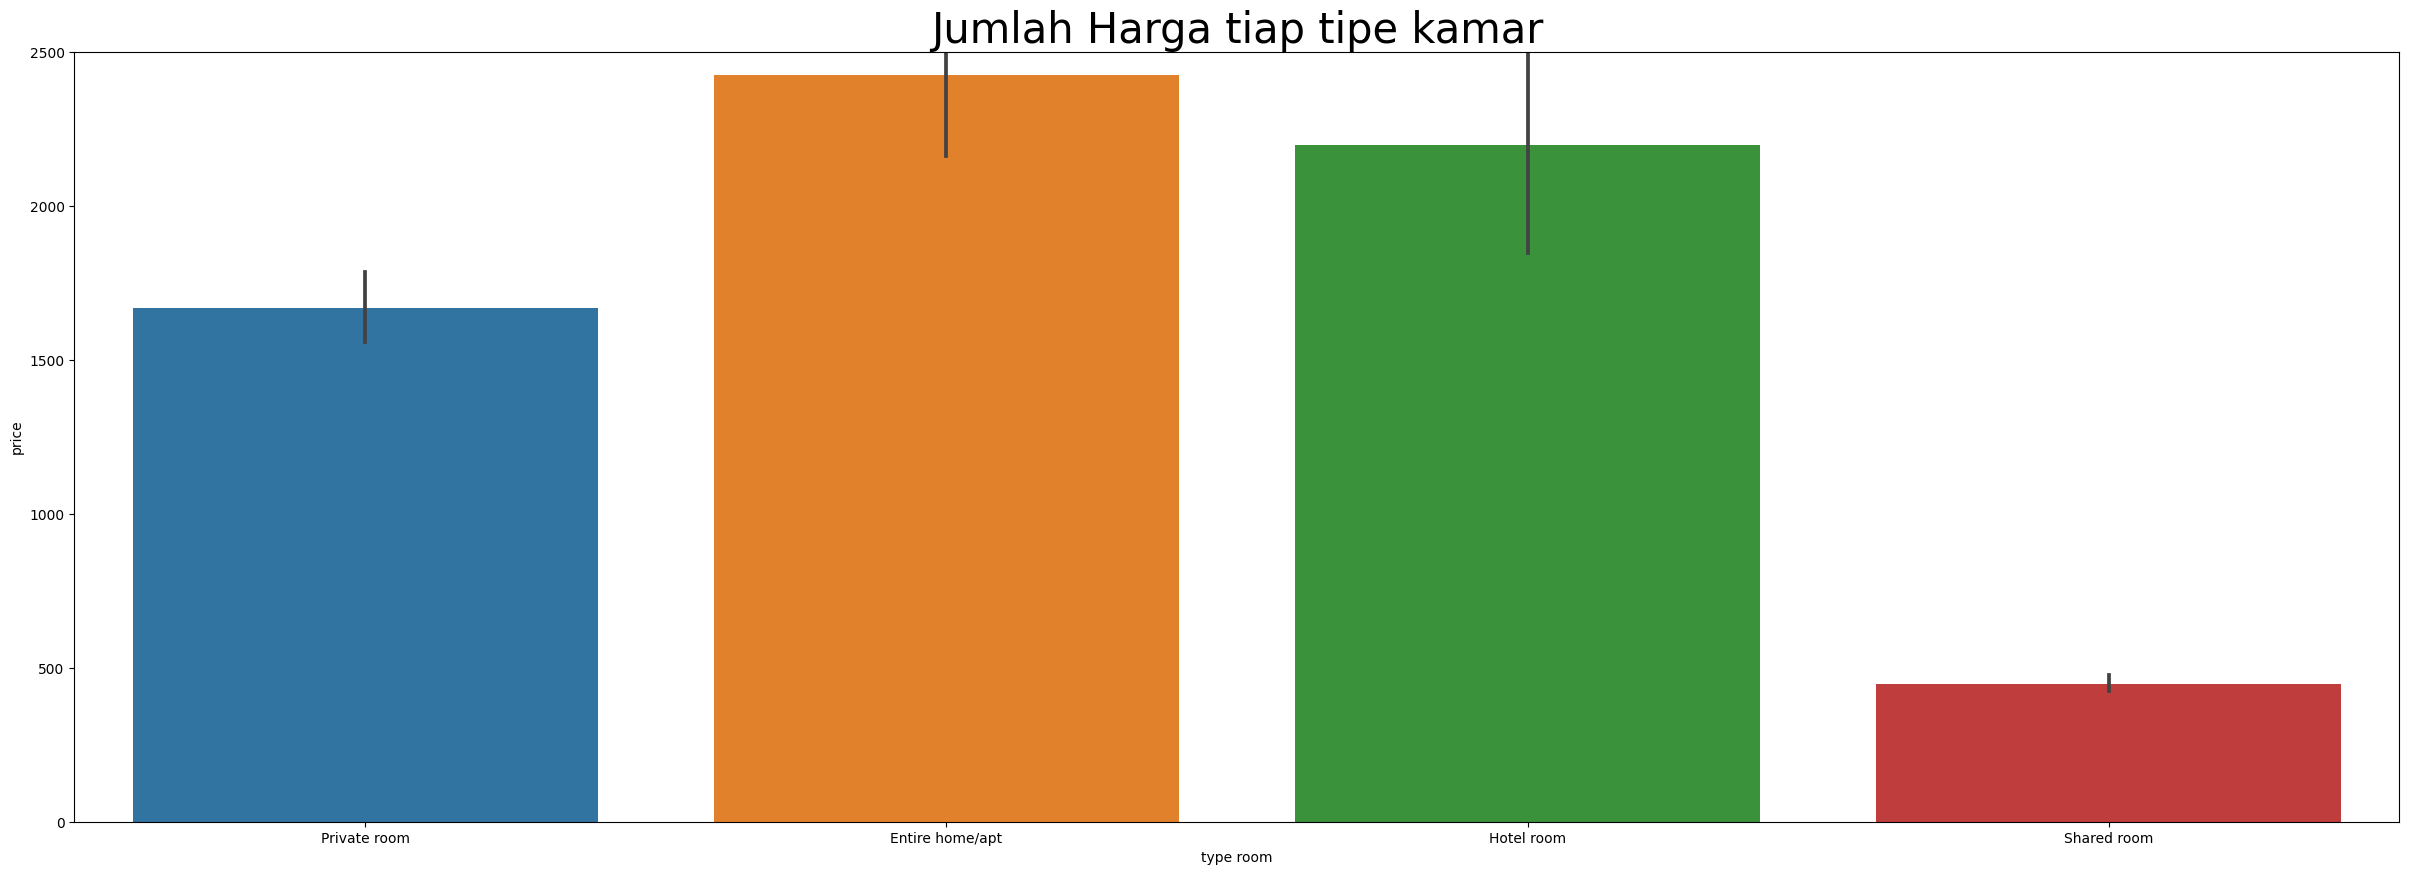

In [37]:
plt.figure(figsize = (30,10))
sns.barplot(data = df1, x = 'room_type', y = 'price')
plt.title("Jumlah Harga tiap tipe kamar", size = 30)
plt.xlabel("type room")
plt.ylabel("price")
y_min = 0
y_max = 2500
plt.ylim(y_min, y_max)

plt.show()
plt.show()

Dari grafik di atas, kita bisa melihat adanya ketimpangan data antara`neighbourhood`,`room_type`,`minimum_nights` dan `price`. oleh karena itu saya harus melihat apakah data`minimum_nights` dan `price` terdistribusi normal atau tidak.

In [38]:
from scipy.stats import normaltest
stats, pval=normaltest(df1['price'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


<Figure size 800x600 with 0 Axes>

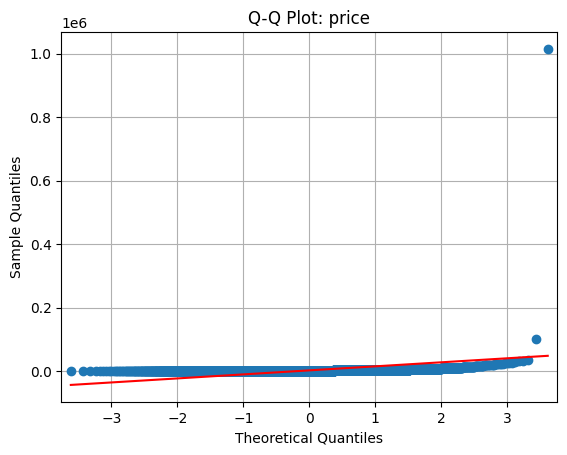

In [39]:
import statsmodels.api as sm
# Create the Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(df1['price'], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot: price')
plt.grid(True)
plt.show()

In [40]:
from scipy.stats import normaltest
stats, pval=normaltest(df1['minimum_nights'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


<Figure size 800x600 with 0 Axes>

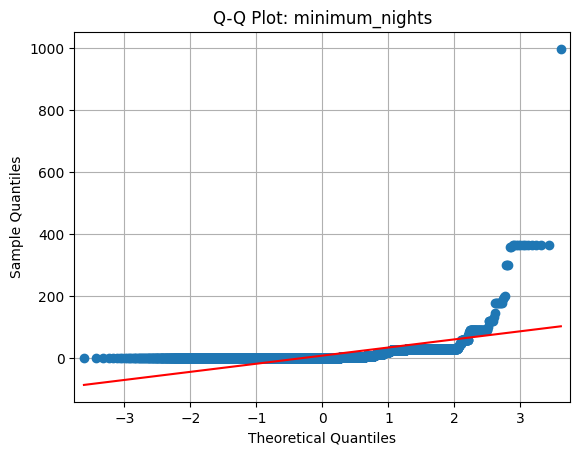

In [41]:
# Create the Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(df1['minimum_nights'], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot: minimum_nights')
plt.grid(True)
plt.show()

##Berdasarkan `name`  

kedua, saya melihat bagaimana pengaruh nama penginapan dengan harga maupun review per bulan. Kita akan menganalisis kolom `name`, `price`,`reviews_per_month` untuk menjawab beberapa pertanyaan. untuk visualisasi yang lengkap, saya menggunakan tableau dengan link:https://public.tableau.com/app/profile/muhammad.rifki.hartanto/viz/Purwadhika_AirBnB_Bangkok/Story1?publish=yes.

In [42]:
df2 = df[['name', 'price','reviews_per_month']]
df2.head()

,name,price,reviews_per_month
3,Spacious one bedroom at The Kris Condo Bldg. 3,1286,3.0
11,2BR apt in a cozy neighborhood,1893,117.0
19,The Duplex - Asoke- Luxury 92sqm,5034,259.0
28,Boutique Rooms Near Bangkok Airport,1329,28.0
30,Studio near Chula University/Silom walk to MRT/BTS,1176,47.0


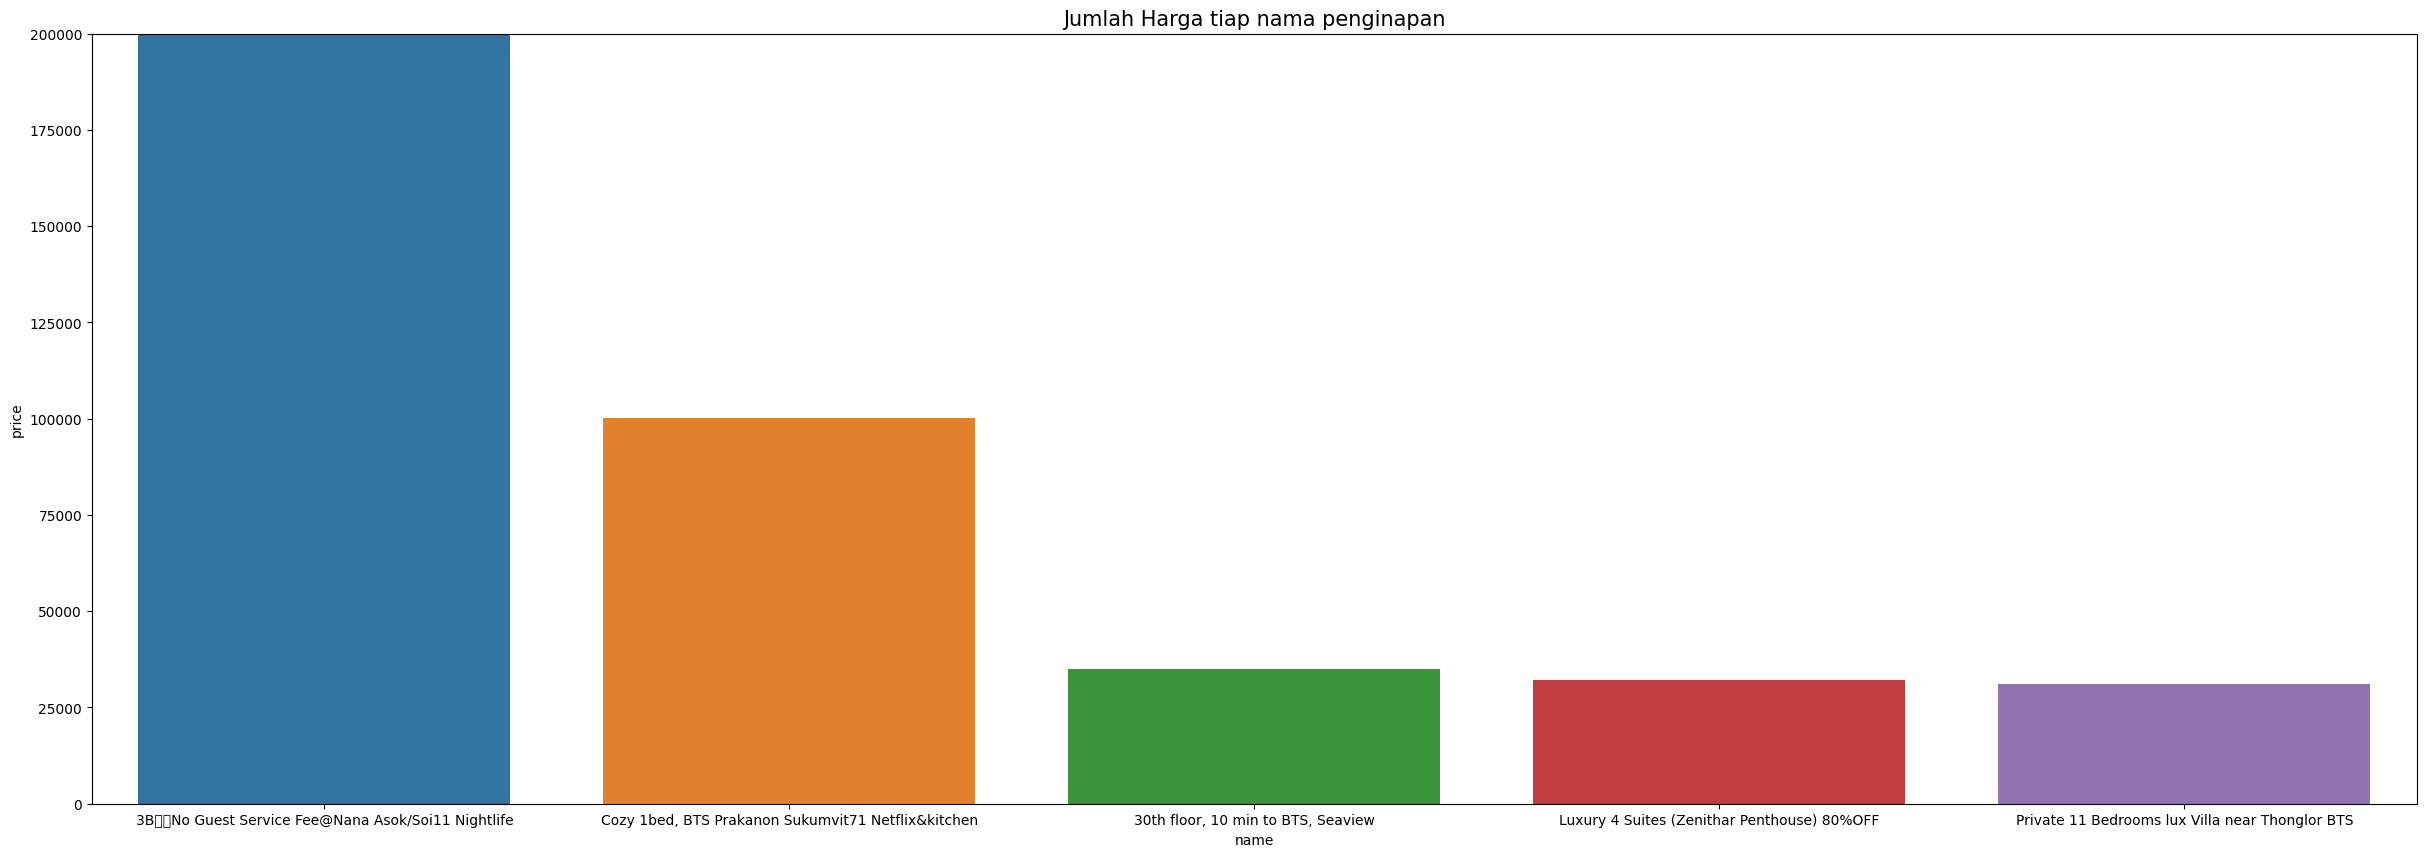

In [43]:
df2_sort1 = df2.nlargest(5, 'price')
plt.figure(figsize = (30,10))
sns.barplot(data = df2_sort1, x = 'name', y = 'price')
plt.title("Jumlah Harga tiap nama penginapan", size = 15)
plt.xlabel("name")
plt.ylabel("price")
y_min = 0
y_max = 200000
plt.ylim(y_min, y_max)

plt.show()

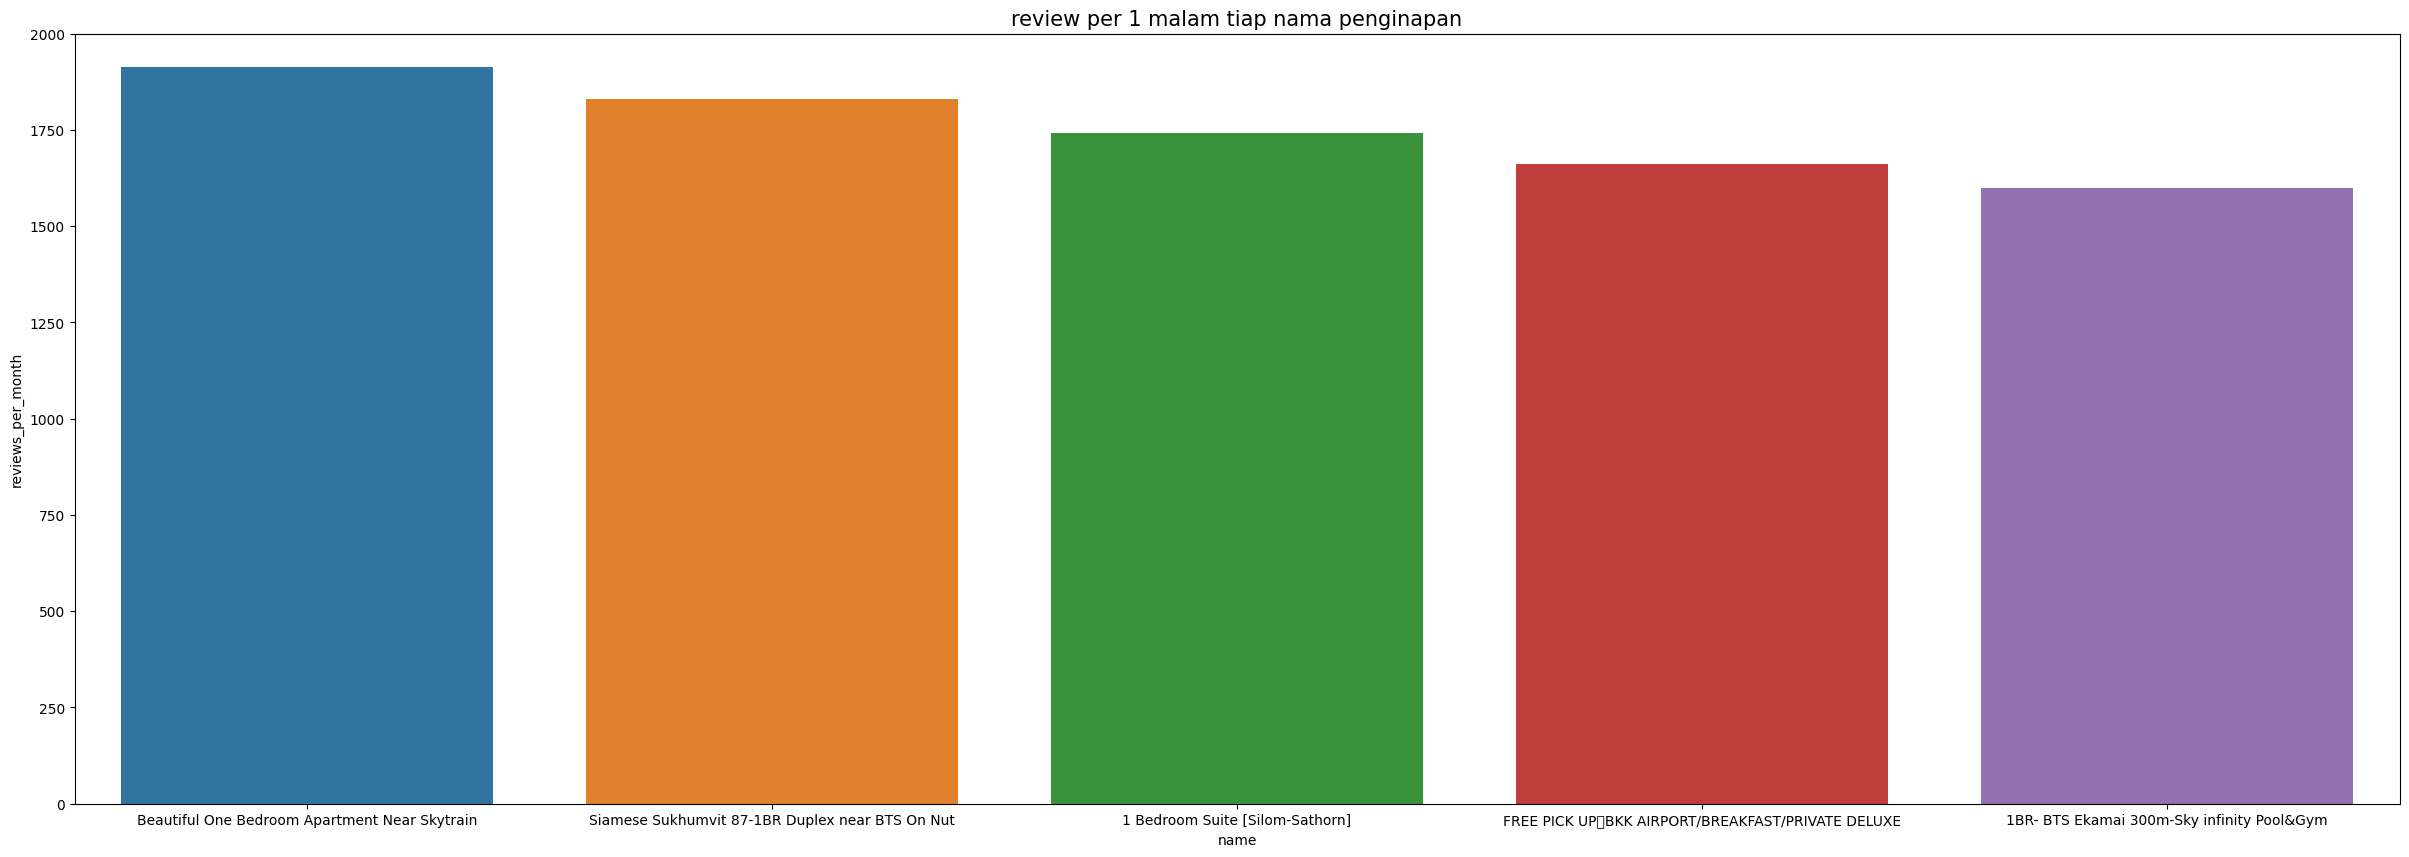

In [44]:
df2_sort2 = df2.nlargest(5, 'reviews_per_month')
plt.figure(figsize = (30,10))
sns.barplot(data = df2_sort2, x = 'name', y = 'reviews_per_month')
plt.title("review per 1 malam tiap nama penginapan", size = 15)
plt.xlabel("name")
plt.ylabel("reviews_per_month")
y_min = 0
y_max = 2000
plt.ylim(y_min, y_max)

plt.show()

Dari grafik di atas, kita bisa melihat adanya ketimpangan data antara `name`, `price`,`reviews_per_month`. oleh karena `price` tidak terdistribusi normal, maka kita akan melihat data `reviews_per_month` terdistribusi normal atau tidak. selain itu memunculkan world counts untuk melihat kata kata yang sering muncul di kolom names.

In [45]:
from scipy.stats import normaltest
stats, pval=normaltest(df2['reviews_per_month'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


<Figure size 800x600 with 0 Axes>

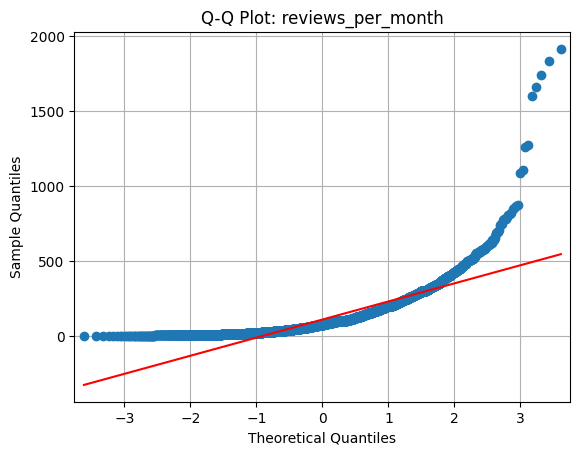

In [46]:

# Create the Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(df2['reviews_per_month'], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot: reviews_per_month')
plt.grid(True)
plt.show()

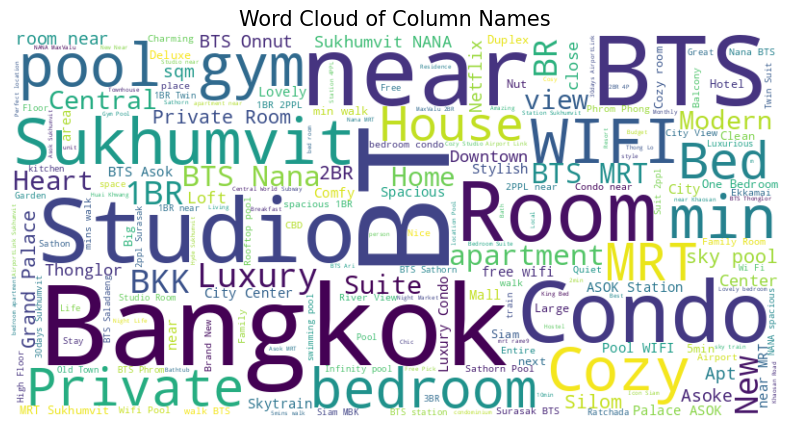

In [47]:
column_names_str = " ".join(df2['name'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(column_names_str)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Column Names', size=15)
plt.show()

##Berdasarkan `availability`  

ketiga, saya melihat bagaimana pengaruh `availability` dengan `number_of_reviews`. Kita akan menganalisis dengan menampilkan pie chart dengan asumsi number of review adalah jumlah turis yang menginap dan memberi penilaian. untuk visualisasi yang lengkap, saya menggunakan tableau dengan link:https://public.tableau.com/app/profile/muhammad.rifki.hartanto/viz/Purwadhika_AirBnB_Bangkok/Story1?publish=yes.

In [48]:
df3 = df[['room_type', 'price','number_of_reviews', 'availability_365']]
df3.head()

,room_type,price,number_of_reviews,availability_365
3,Private room,1286,2,Yes
11,Entire home/apt,1893,129,Yes
19,Entire home/apt,5034,287,Yes
28,Private room,1329,28,Yes
30,Entire home/apt,1176,63,No


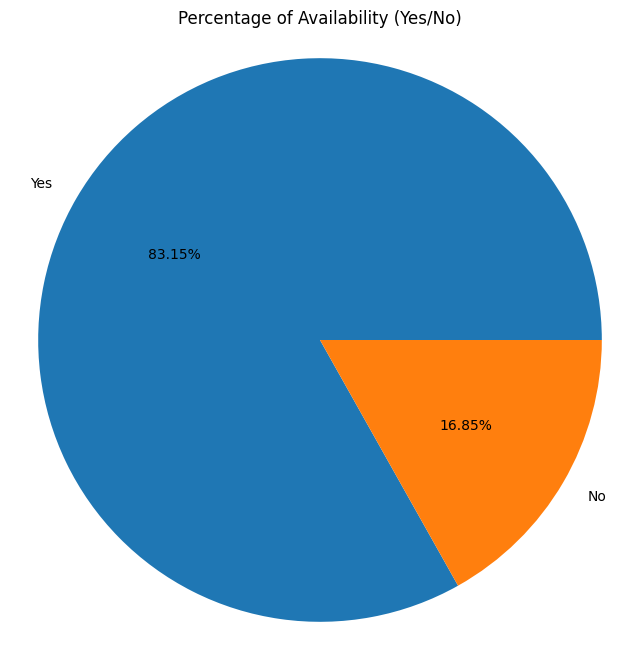

In [49]:
availability_count = df3['availability_365'].value_counts()
# Calculate the percentage of 'Yes' and 'No'
total = availability_count.sum()
percentage_yes = (availability_count['Yes'] / total) * 100
percentage_no = (availability_count['No'] / total) * 100

# Create the pie chart
labels = ['Yes', 'No']
percentages = [percentage_yes, percentage_no]
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%.2f%%')
plt.title('Percentage of Availability (Yes/No)')
plt.axis('equal')
plt.show()

In [50]:
from scipy.stats import normaltest
stats, pval=normaltest(df3['number_of_reviews'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [51]:
df3['availability'] = df3['availability_365'].map({'Yes': 1, 'No': 0}).astype(int)
df3.head()

,room_type,price,number_of_reviews,availability_365,availability
3,Private room,1286,2,Yes,1
11,Entire home/apt,1893,129,Yes,1
19,Entire home/apt,5034,287,Yes,1
28,Private room,1329,28,Yes,1
30,Entire home/apt,1176,63,No,0


In [52]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df3[df3['availability']==i]['number_of_reviews'] for i in df3['availability'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Gagal menolak Ho


sesuai dengan data yang kita punya dan berdasarkan performa dari Mann-Whitney U test, kita tidak punya cukup bukti untuk membuktikan bahwa ada perbedaan signifikan antara `availability_365` dan `number_of_reviews`.

In [53]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df3[df3['availability']==i]['price'] for i in df3['availability'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


sesuai dengan data yang kita punya dan berdasarkan performa dari Mann-Whitney U test, kita punya cukup bukti untuk membuktikan bahwa ada perbedaan signifikan antara `availability_365` dan `price`.



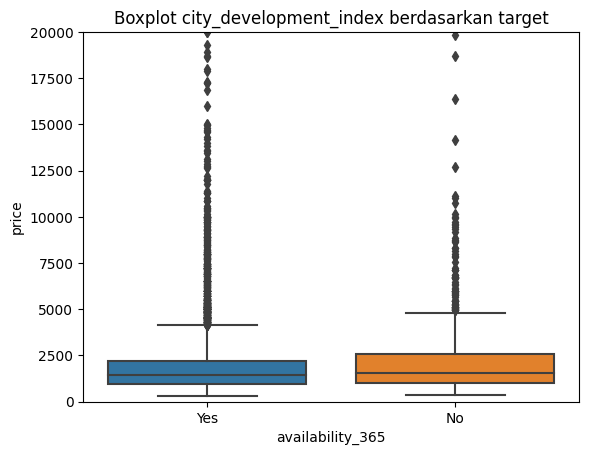

In [54]:
sns.boxplot(y='price', x='availability_365', data=df3)
plt.title('Boxplot city_development_index berdasarkan target')
y_min = 0
y_max = 20000
plt.ylim(y_min, y_max)
plt.show()

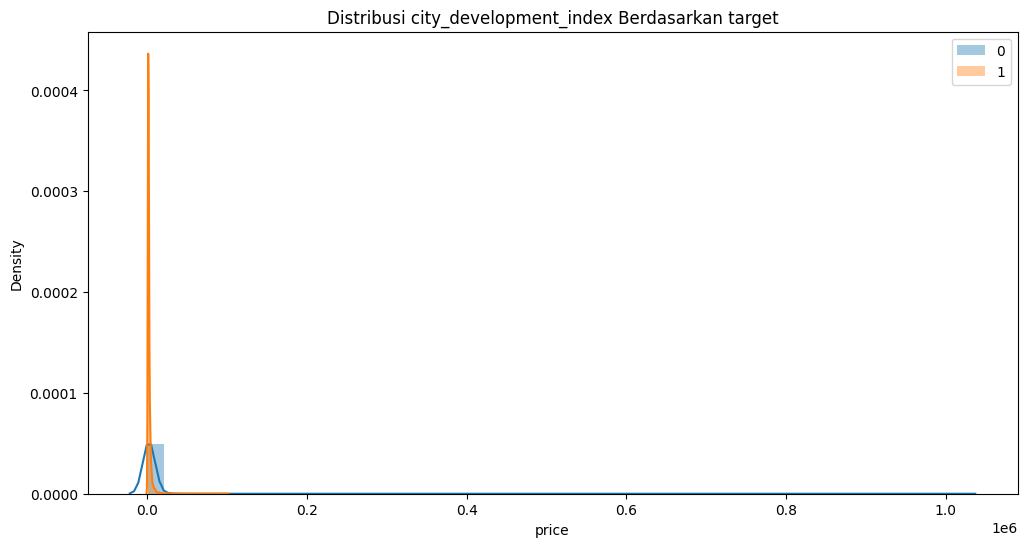

In [55]:
plt.figure(figsize=(12,6))
sns.distplot(df3[df3['availability']==0]['price'],label=0)
sns.distplot(df3[df3['availability']==1]['price'],label=1)
plt.title('Distribusi city_development_index Berdasarkan target')
plt.legend()
plt.show()

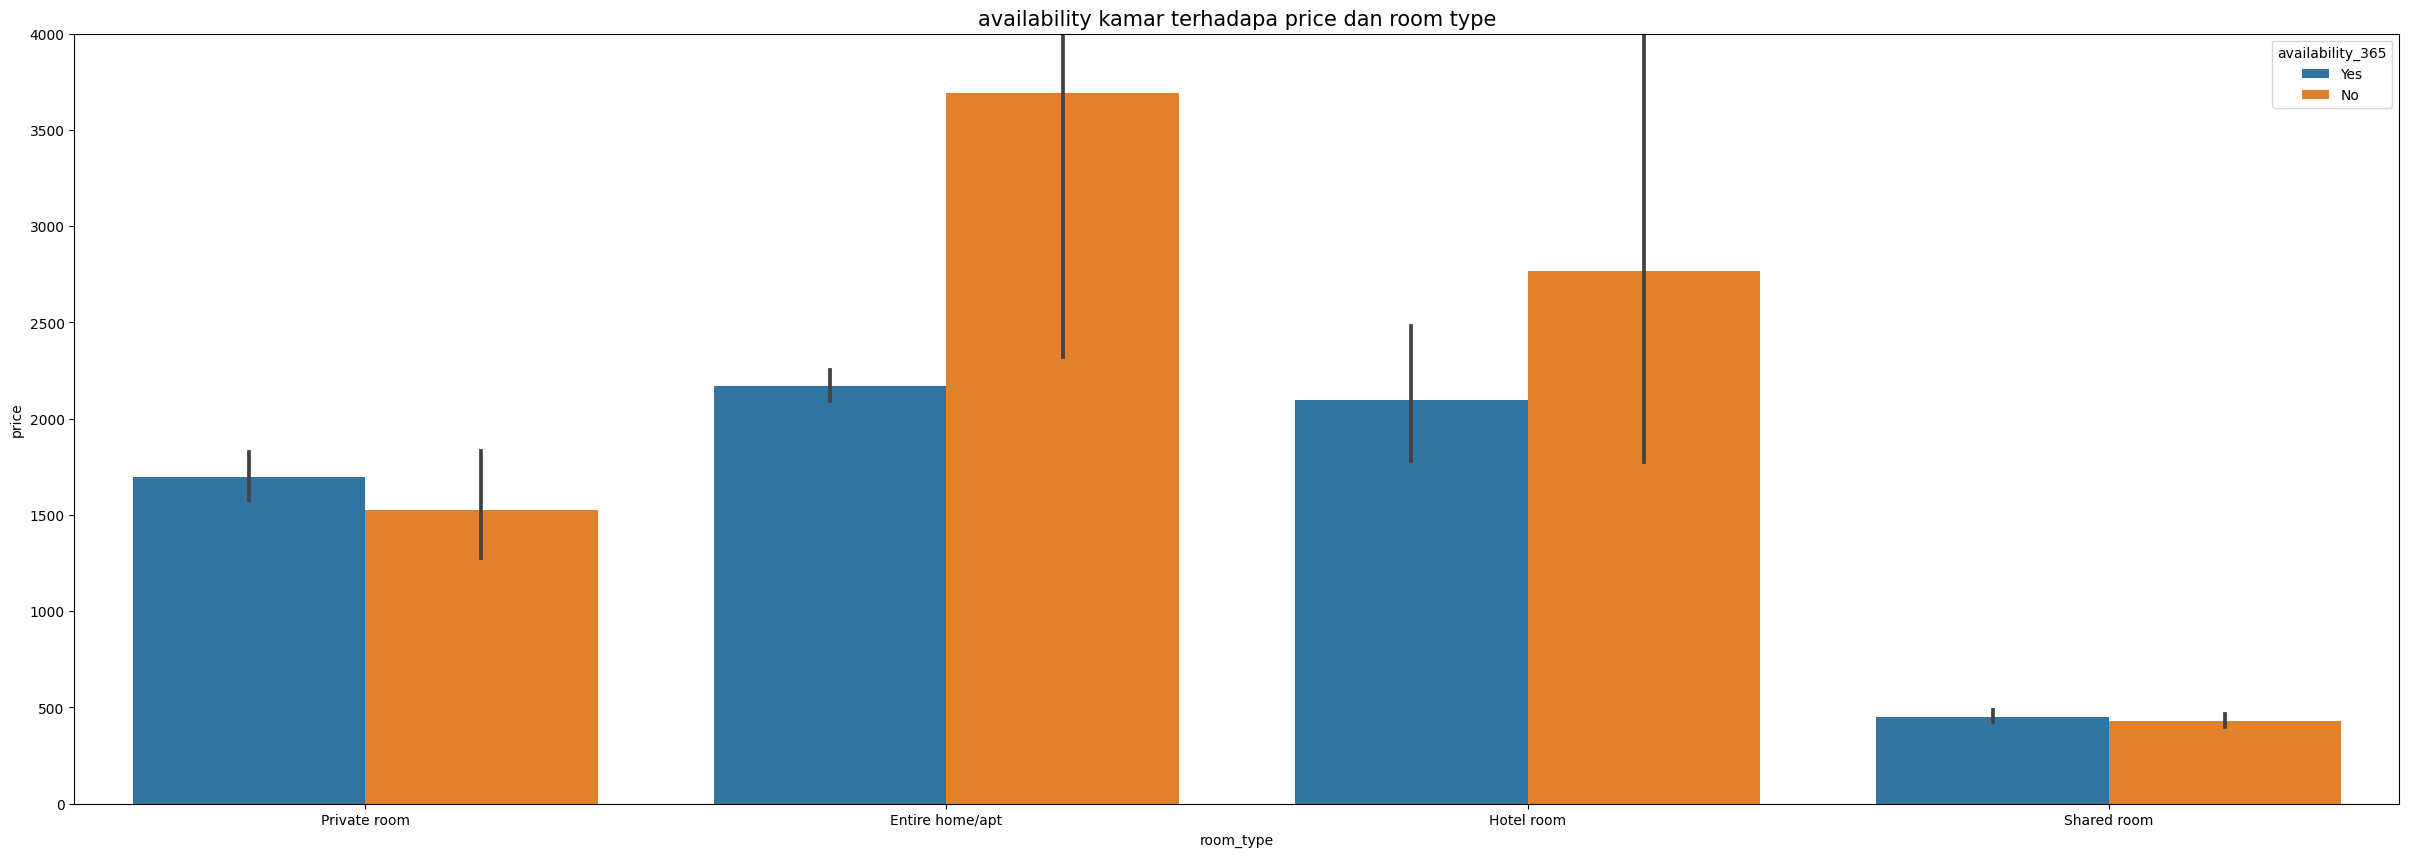

In [60]:
plt.figure(figsize = (30,10))
sns.barplot(data = df3, x = 'room_type', y = 'price', hue = 'availability_365')
plt.title("availability kamar terhadapa price dan room type", size = 15)
plt.xlabel("room_type")
plt.ylabel("price")
y_min = 0
y_max = 4000
plt.ylim(y_min, y_max)

plt.show()

# Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tetang kandidat yang ingin direkrut:
* Dari awal 15854 data yang kemudian mengrucut menjadi 6634, dan hal iyu disebabkan adanya missing value maupun data anomali sehingga hanya 5516 data kesedian kamar untuk turis.
* wilayah paling banyak dimention adalah wilayah Vadhana dengan minimal menginap 10 hari,dengan total harga mencapai 4000k $, dan turis sering menyewa villa di sana.
* Walaupun memiliki perbedaan visualisai dengan tableau, Tempat penginapan yang mempunyai profit banyak belum tentu memiliki review per bulan yang bagus juga.
* berdasarkan Availability atau ketersedian kamar, kebanyakan turis memilih menyewa villa full setahun (No berarti kamar penuh) walaupun harga mahal.




**Rekomendasi**
1. Dikarenakan Data 15854 data yang berubah menjadi 6634 sebaiknya setiap tempat penginapan memberikan formulir penilaian ke setiap turis yang akan check out dari tempat penginapan. Selain itu, diskon harga dapat membantu para pemilik penginapan untuk mendapatkan konsumen lebih banyak.
2. Utamakan budget tiap masing - masing budget karena tingkat harga tiap wilayah berbeda beda walaupun tidak semua tempat penginapan mempunyai harga sama di wilayah tersebut.
3. walaupun masih dengan perkiraan menentukan tempat penginapan penuh atau tidak, Turis harus sebisa mungkin memesan tempat penginapan jauh sebelum hari keberangkatan dan secepat mungkin menentukan tempat karena ditakutkan akan tempat penginapan bagus yang dituju akan penuh.